In [8]:
!pip install seaborn matplotlib numpy pandas

In [9]:
! conda install scikit-learn

Fetching package metadata ...
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/vak000/anaconda3:
#
scikit-learn              0.19.1           py36hffbff8c_0  


# Introduction

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [11]:
#Load the data
boston = load_boston()
print(boston.data.shape)

X, y = boston.data, boston.target

m = X.shape[0]
n = X.shape[1]

(506, 13)


In [12]:
X

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [13]:
#Split into training/validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape

(339, 13)

In [14]:
#Linear regression
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#predict and check the error
predicted = lr.predict(X_test)
mean_squared_error(y_test, predicted)

20.747143360308918

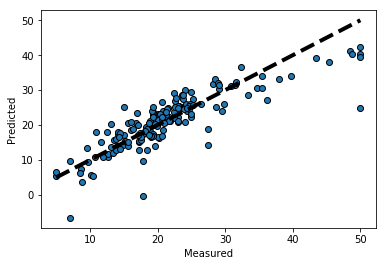

In [16]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Linear Regression in Keras

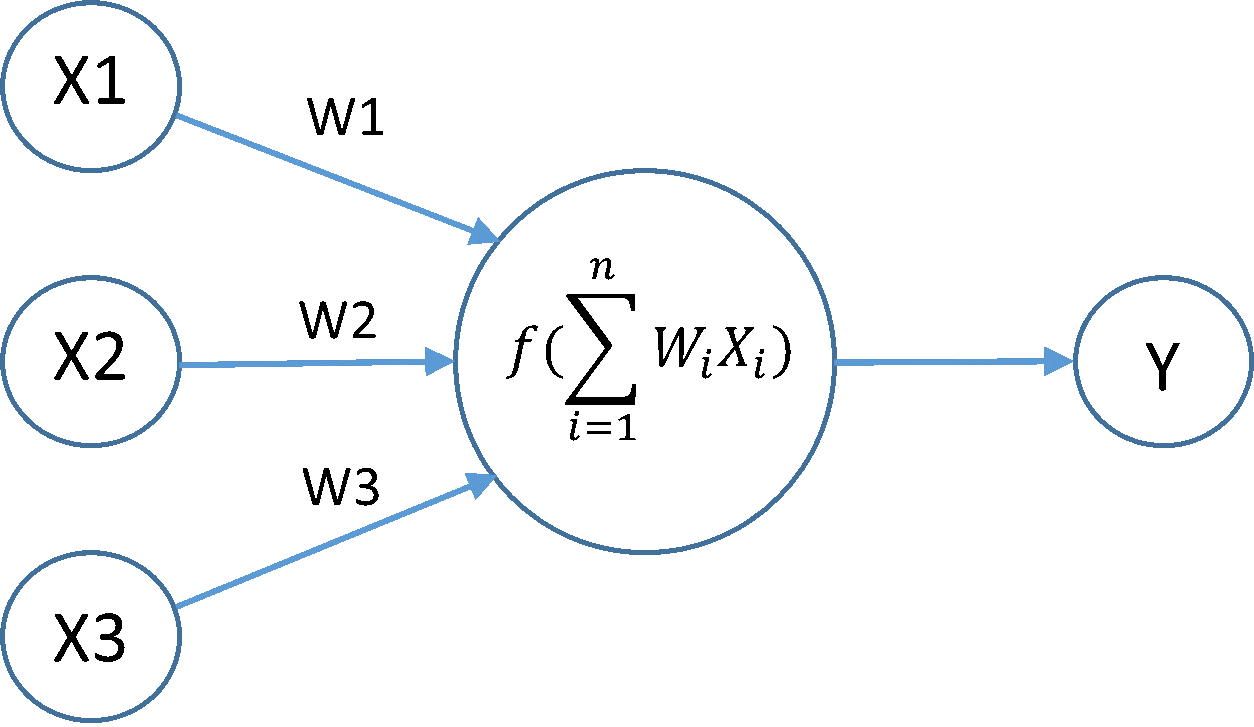

In [12]:
from IPython.display import Image
Image(filename='img/neuron.png', width=500, height=100)

In [13]:

model=Sequential()

model.add(Dense(1, input_dim=n))
#stochastic gradien descent
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(X_test, y_test))

Train on 339 samples, validate on 167 samples
Epoch 1/5
339/339 [==============================] - 0s 423us/step - loss: inf - mean_squared_error: inf - val_loss: inf - val_mean_squared_error: inf
Epoch 2/5
339/339 [==============================] - 0s 22us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/5
339/339 [==============================] - 0s 22us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/5
339/339 [==============================] - 0s 22us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/5
339/339 [==============================] - 0s 23us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan


### 1. Scale the data!

In [14]:
print('Max value in X: {}, min value: {} '.format(X_train.max(), X_train.min()))

Max value in X: 711.0, min value: 0.0 


Max value in X: 11.168424370776268, min value: -4.047825494428903 


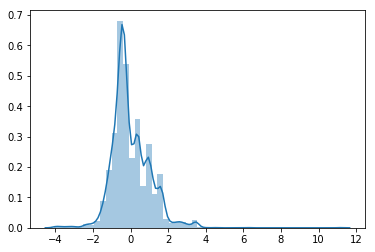

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

print('Max value in X: {}, min value: {} '.format(X_train.max(), X_train.min()))

sns.distplot(X_train.reshape(-1));

In [38]:
model=Sequential()
model.add(Dense(1, activation='linear', input_dim=n))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train,
          batch_size=64, epochs=100,
          validation_data=(X_test, y_test))

Train on 339 samples, validate on 167 samples
Epoch 1/100
339/339 [==============================] - 0s 934us/step - loss: 2577.2608 - mean_squared_error: 2577.2608 - val_loss: 2338.9640 - val_mean_squared_error: 2338.9640
Epoch 2/100
339/339 [==============================] - 0s 25us/step - loss: 2300.8375 - mean_squared_error: 2300.8375 - val_loss: 2104.2975 - val_mean_squared_error: 2104.2975
Epoch 3/100
339/339 [==============================] - 0s 27us/step - loss: 2076.6885 - mean_squared_error: 2076.6885 - val_loss: 1932.2228 - val_mean_squared_error: 1932.2228
Epoch 4/100
339/339 [==============================] - 0s 26us/step - loss: 1906.9529 - mean_squared_error: 1906.9529 - val_loss: 1810.9646 - val_mean_squared_error: 1810.9646
Epoch 5/100
339/339 [==============================] - 0s 25us/step - loss: 1791.8704 - mean_squared_error: 1791.8704 - val_loss: 1724.8159 - val_mean_squared_error: 1724.8159
Epoch 6/100
339/339 [==============================] - 0s 27us/step - los

339/339 [==============================] - 0s 25us/step - loss: 166.0599 - mean_squared_error: 166.0599 - val_loss: 192.0827 - val_mean_squared_error: 192.0827
Epoch 95/100
339/339 [==============================] - 0s 25us/step - loss: 164.1812 - mean_squared_error: 164.1812 - val_loss: 190.5729 - val_mean_squared_error: 190.5729
Epoch 96/100
339/339 [==============================] - 0s 26us/step - loss: 162.1628 - mean_squared_error: 162.1628 - val_loss: 189.1317 - val_mean_squared_error: 189.1317
Epoch 97/100
339/339 [==============================] - 0s 24us/step - loss: 160.4571 - mean_squared_error: 160.4571 - val_loss: 187.7875 - val_mean_squared_error: 187.7875
Epoch 98/100
339/339 [==============================] - 0s 25us/step - loss: 158.7070 - mean_squared_error: 158.7070 - val_loss: 186.4583 - val_mean_squared_error: 186.4583
Epoch 99/100
339/339 [==============================] - 0s 27us/step - loss: 156.9232 - mean_squared_error: 156.9232 - val_loss: 185.0178 - val_mean

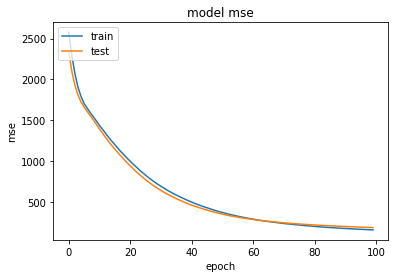

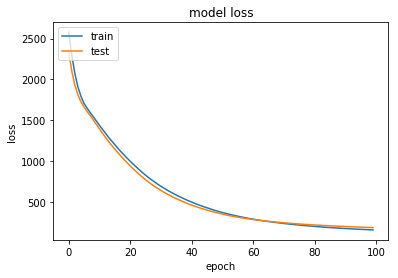

In [39]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Neural Network

Visit: http://playground.tensorflow.org

In [40]:
Image(filename='img/network.png', width=700)

# 2 layers network

NameError: name 'Image' is not defined

In [41]:
model=Sequential()
model.add(Dense(32, activation='linear', input_dim=n))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train, y_train, epochs=30,
          validation_data=(X_test, y_test))

Train on 339 samples, validate on 167 samples
Epoch 1/30
339/339 [==============================] - 0s 43us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/30
339/339 [==============================] - 0s 40us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/30
339/339 [==============================] - 0s 41us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/30
339/339 [==============================] - 0s 39us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/30
339/339 [==============================] - 0s 38us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/30
339/339 [==============================] - 0s 39us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/30
339/339 [============================

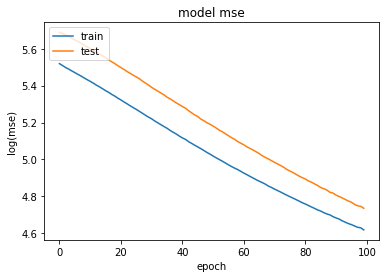

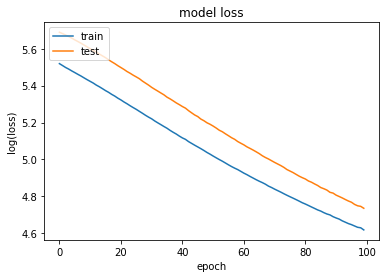

In [22]:
plt.plot(np.log(history.history['mean_squared_error']))
plt.plot(np.log(history.history['val_mean_squared_error']))
plt.title('model mse')
plt.ylabel('log(mse)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(np.log(history.history['loss']))
plt.plot(np.log(history.history['val_loss']))
plt.title('model loss')
plt.ylabel('log(loss)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
#Image(filename='img/activation.png', width=700)